In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bnk=pd.read_excel('G:/AnalytixLab/PYTHON & Machine learning/Assignment/M.L assignments/Text Mining (NLPNLG, Classification, Segmentation, Sentiment)/Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [3]:
bnk

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [4]:
import string
import re    #for regex
from textblob import TextBlob
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

Data-Processing.

In [5]:
# Regular-Expressions

bnk['Reviews'] = bnk['Reviews'].astype(str)
bnk['count_sent']=bnk['Reviews'].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
bnk['count_word']=bnk['Reviews'].apply(lambda x: len(str(x).split()))

#Unique word count
bnk['count_unique_word']=bnk['Reviews'].apply(lambda x: len(set(str(x).split())))

#Letter count
bnk['count_letters']=bnk['Reviews'].apply(lambda x: len(str(x)))

#Word density

bnk['word_density'] = bnk['count_letters'] / (bnk['count_word']+1)

#punctuation count
bnk["count_punctuations"] =bnk['Reviews'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
bnk["count_words_upper"] = bnk['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
bnk["count_words_lower"] = bnk['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
bnk["count_words_title"] = bnk['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
bnk["count_stopwords"] = bnk['Reviews'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
bnk["mean_word_len"] = bnk['Reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
bnk['numeric'] = bnk['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
bnk['alphanumeric'] = bnk['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
bnk['alphabetetics'] = bnk['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
bnk['Spaces'] = bnk['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
bnk['words_ends_with_et'] = bnk['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
bnk['words_start_with_no'] = bnk['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
bnk['wordcounts'] = bnk['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

bnk['noun_count'] = bnk['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
bnk['verb_count'] = bnk['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
bnk['adj_count']  = bnk['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
bnk['adv_count']  = bnk['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
bnk['pron_count'] = bnk['Reviews'].apply(lambda x: check_pos_tag(x, 'pron'))

In [6]:
bnk.head(1)

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.3,4,...,15,0,0,0,"{'was': 1, 'through': 1, 'job,': 1, 'you!': 1,...",0,0,0,0,0


Classification of reviews into +ve, -ve or Neutral (Sentiment-Analysis).

In [7]:
bnk['sentiment'] = bnk["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [8]:
# Positive Reviews Percentage
previews=(bnk['sentiment']>0).sum()
print(f'Positive-Reviews: {(previews/len(bnk["Reviews"]))*100}')


# Neagtive Reviews Percentage
nreviews=(bnk['sentiment']<0).sum()
print(f'Negative-Reviews: {(nreviews/len(bnk["Reviews"]))*100}')


# Neutral Reviews Percentage
neutral_reviews=(bnk['sentiment']==0).sum()
print(f'Neutral-Reviews: {(neutral_reviews/len(bnk["Reviews"]))*100}')


Positive-Reviews: 92.27722772277228
Negative-Reviews: 6.9306930693069315
Neutral-Reviews: 0.7920792079207921


Topic-Modelling & most-frequent words.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from wordcloud import WordCloud ,STOPWORDS

In [10]:
from sklearn.model_selection import train_test_split
# define X and y
X = bnk.Reviews
y = bnk.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=786)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


In [11]:
#Abbrevations and Words correction

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

stop = set(nltk.corpus.stopwords.words('english'))

def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    return(text)

X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [12]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

In [15]:
count_vect.get_feature_names()

['aaron',
 'ability',
 'able',
 'absolutely',
 'accept',
 'account',
 'accurate',
 'across',
 'actual',
 'adam',
 'adan',
 'additional',
 'advice',
 'agent',
 'agreed',
 'alex',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'amount',
 'another',
 'answer',
 'answered',
 'answering',
 'answers',
 'antebellum',
 'anthony',
 'anyone',
 'anything',
 'application',
 'apply',
 'appraisal',
 'appraiser',
 'appreciate',
 'appreciated',
 'around',
 'ask',
 'asked',
 'asking',
 'aspects',
 'attention',
 'attentive',
 'attorney',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'balance',
 'bank',
 'banker',
 'banks',
 'barrett',
 'based',
 'beat',
 'begin',
 'beginning',
 'believe',
 'beneficial',
 'best',
 'better',
 'beyond',
 'big',
 'bob',
 'bought',
 'brent',
 'broker',
 'business',
 'buy',
 'buyers',
 'buying',
 'ca',
 'call',
 'called',
 'calling',
 'calls',
 'calm',
 'came',
 'cannot',
 'cant',
 'capital',
 'care',
 'causing',
 'challenging',
 'change',
 'changed'

In [17]:
dtm=xtrain_count.toarray()
dtm1=pd.DataFrame(dtm)
dtm1.columns=count_vect.get_feature_names()
dtm1.head()

,aaron,ability,able,absolutely,accept,account,accurate,across,actual,adam,...,worked,working,works,would,wouldnt,wrong,wyndham,year,years,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
dtm2.head(3)

,aaron,ability,able,absolutely,accept,account,accurate,across,actual,adam,...,worked,working,works,would,wouldnt,wrong,wyndham,year,years,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.105021,0.0,0.077652,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.387722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# ngram level tf-idf 

tfidf_vect_ngram =TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(bnk['Reviews'])
xtrain_tfidf_ngram =tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =tfidf_vect_ngram.transform(X_test)

In [24]:
# train a LDA Model

lda_model =LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [25]:
# view the topic models

n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['jon good best guy expectations exceeded surprises recommended possible officer',
 'va extremely unprofessional nasb closing communicate adam easily nasbs meet',
 'website answers higher point fees explain someone interest rate quickly',
 'real bank fine talk people pleasure business great jon husband',
 'nasb va loan total tough team military home state incredibly',
 'poor notary talking look clear used mr contacted house comps',
 'process great us questions home work recommend team loan easy',
 'kory joey officer chose pleased nasb financial wife loan felt',
 'excellent little triumph options used works manner support responsiveness process',
 'would rate loan read get closing us company information anthony',
 'helpful well manner timely appreciated professional done excellent able kory',
 'dallas hard come closed make beyond note us professional personal',
 'mr june jason appraisal anyone looking ca guys beneficial pacific',
 'efficient friendly record hands pretty paperwork id wit

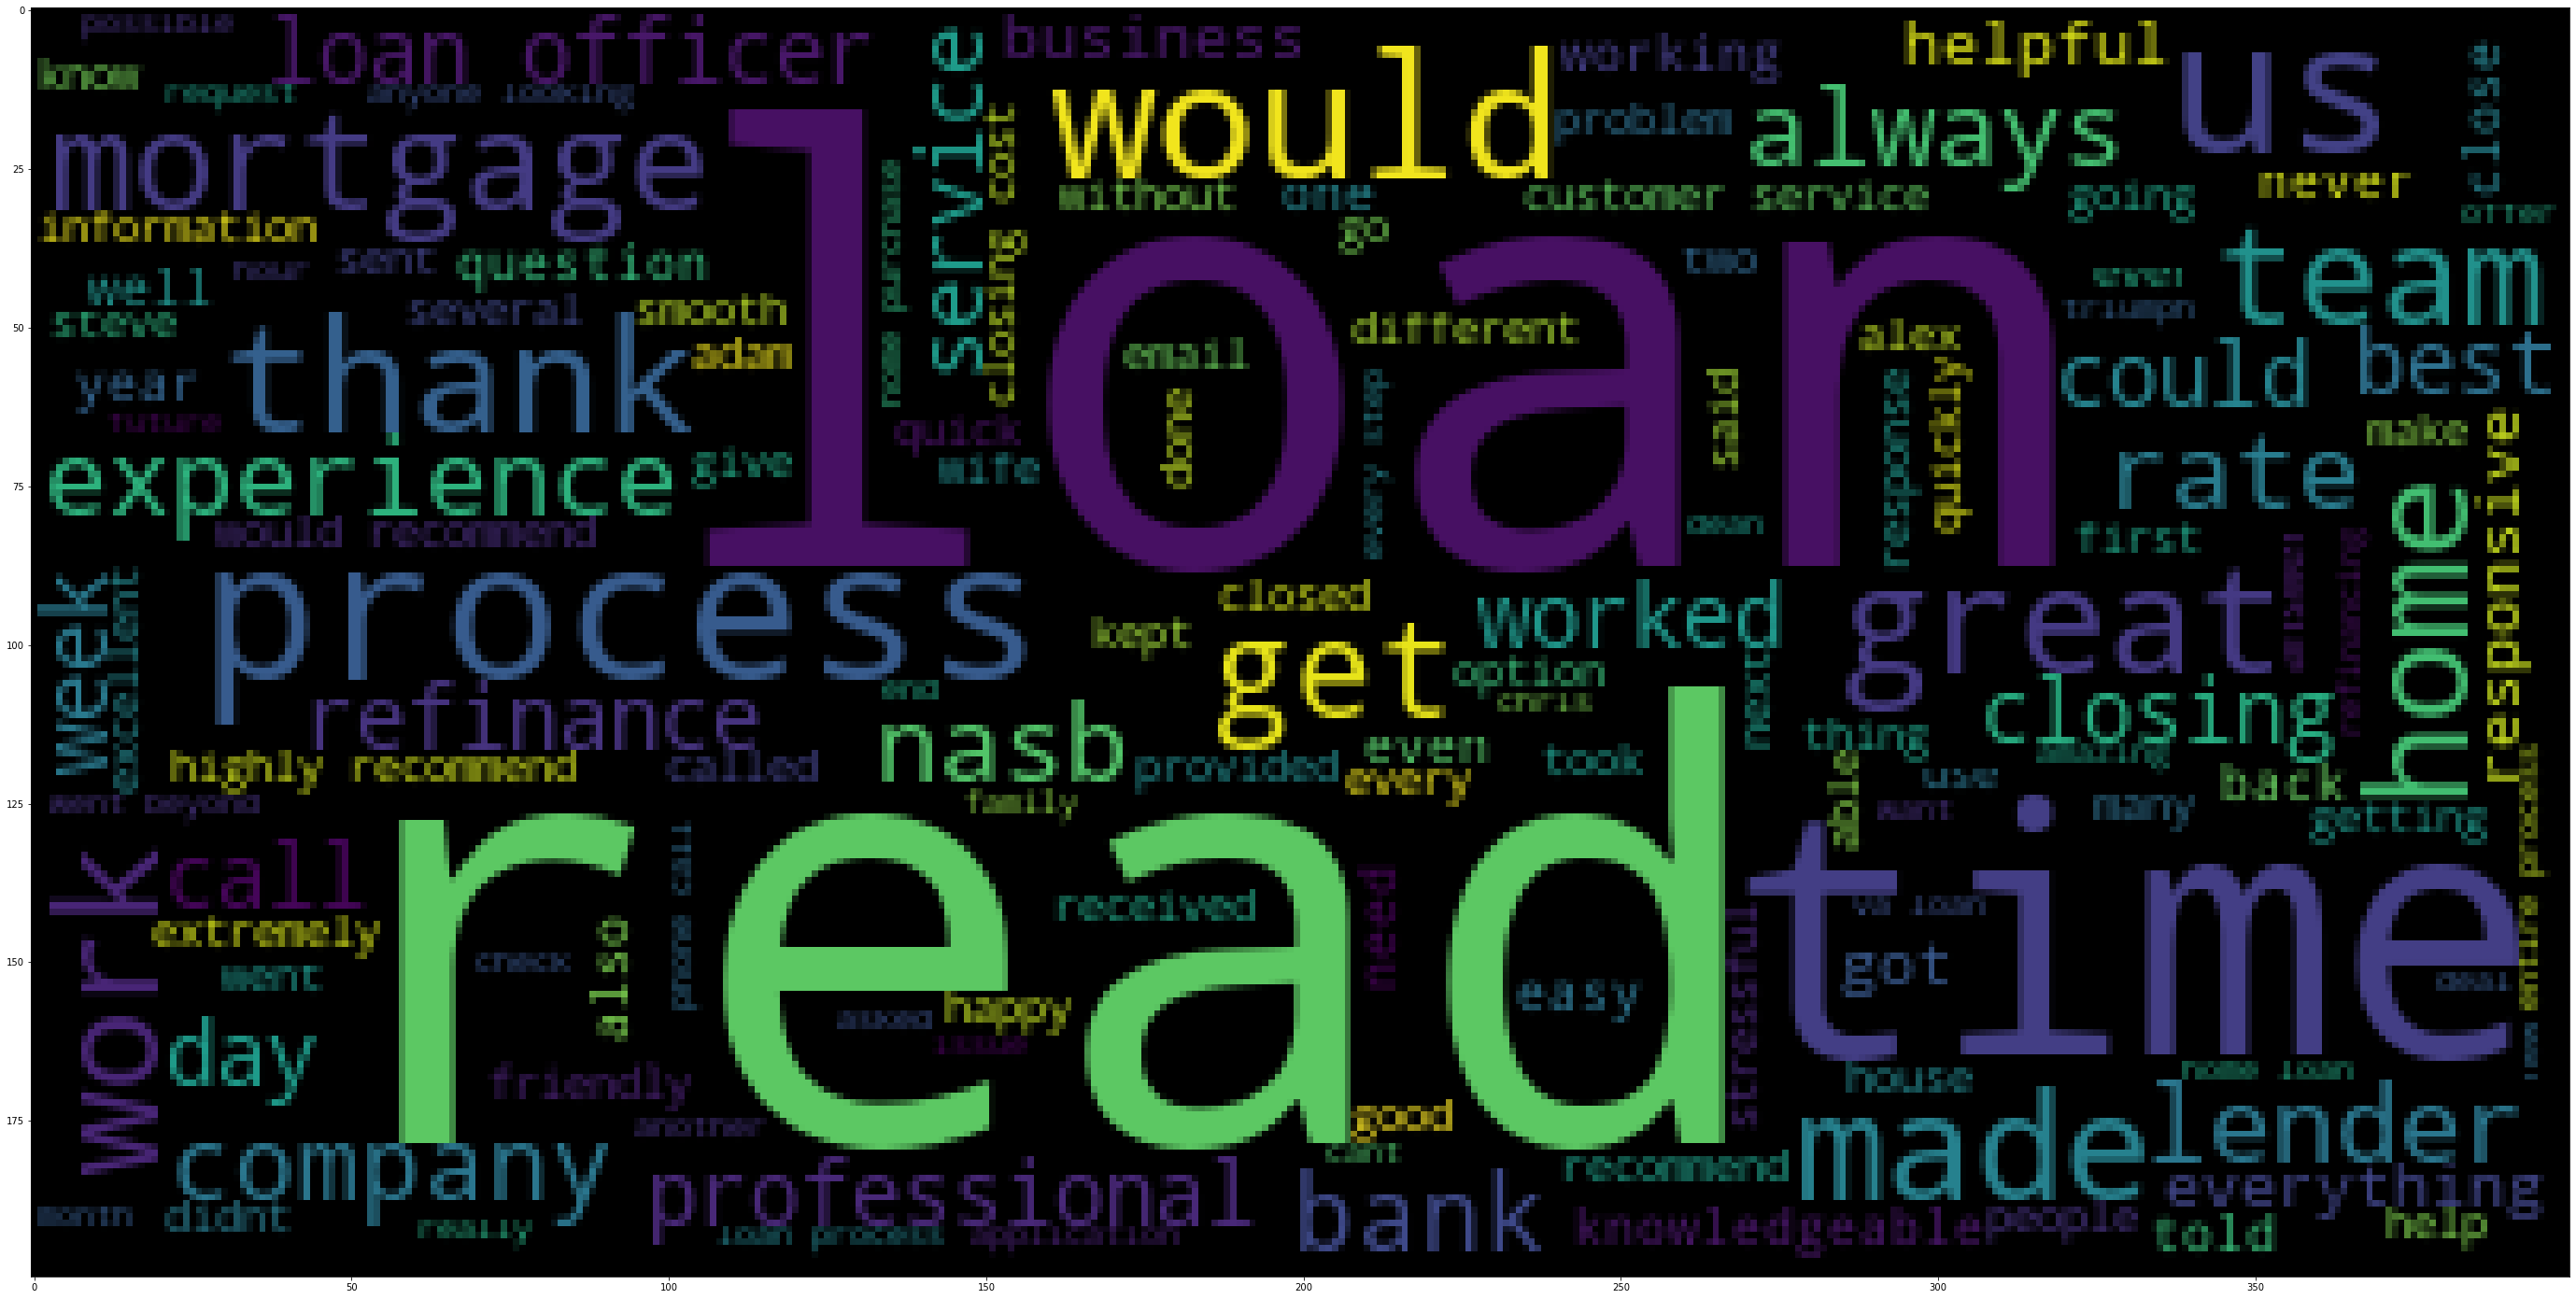

In [28]:
# Creation of word-cloud.

wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))
fig = plt.figure(figsize=(200,25))
plt.imshow(wordcloud)

Identify key-themes of problems/reviews (Clustering)

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [35]:
# get the tf-idf table 
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(bnk['Reviews'])

# Create a training data
X_train = vectorizer.transform(bnk['Reviews'])

In [45]:
# Model creation for clustering

model = KMeans(n_clusters=6,init='k-means++',max_iter=100, n_init=1,random_state=5)

# apply the model on prepared data i.e. X_train
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [46]:
# Getting the vocalbulary as well as cluster centers, firstly, set of words from the tf-idf itself

vocab = vectorizer.get_feature_names()
vocab = np.array(vocab) 

# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'time', 'knowledgeable', 'helpful', 'getting', 'friendly', 'excellent', 'closed', 'able', 'loan', 'professional'}
{'time', 'knowledgeable', 'company', 'helpful', 'best', 'getting', 'friendly', 'excellent', 'refinance', 'able', 'loan', 'professional', 'loan officer', 'customer', 'mortgage', 'closed', 'officer', 'service', 'customer service'}
{'closing', 'time', 'knowledgeable', 'company', 'helpful', 'best', 'getting', 'friendly', 'excellent', 'refinance', 'day', 'read', 'weeks', 'able', 'got', 'loan', 'professional', 'loan officer', 'customer', 'told', 'mortgage', 'took', 'closed', 'officer', 'rate', 'service', 'customer service'}
{'closing', 'time', 'knowledgeable', 'company', 'helpful', 'best', 'getting', 'work', 'questions', 'friendly', 'excellent', 'refinance', 'day', 'read', 'weeks', 'great', 'able', 'got', 'answered', 'loan', 'professional', 'easy', 'responsive', 'loan officer', 'customer', 'told', 'mortgage', 'took', 'closed', 'officer', 'rate', 'team', 'service', 'customer serv

Predicting star-ratings using reviews.

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [47]:
#Naive Bayes on Count Vectors and TF-IDF

from sklearn import naive_bayes
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  (0.9497354497354498, 0.952755905511811)


In [49]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)


# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)


# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)


LR  for L1, Count Vectors:  (1.0, 0.9448818897637795)
LR  for L1, WordLevel TF-IDF:  (1.0, 0.9606299212598425)
LR  for L1, N-Gram Vectors:  (1.0, 0.9291338582677166)


In [52]:
#XGBoosting

from xgboost import XGBClassifier

# XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  (0.9920634920634921, 0.9133858267716536)
LR  for L1, WordLevel TF-IDF:  (0.9920634920634921, 0.9291338582677166)
LR  for L1, N-Gram Vectors:  (0.9920634920634921, 0.9133858267716536)


In [53]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Gradient Boosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(GradientBoostingClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  (0.9973544973544973, 0.9291338582677166)
LR  for L1, WordLevel TF-IDF:  (0.9947089947089947, 0.952755905511811)
LR  for L1, N-Gram Vectors:  (0.9973544973544973, 0.905511811023622)


In [54]:
#ANN

from sklearn.neural_network import MLPClassifier

# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)


# ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)


# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  (1.0, 0.968503937007874)
LR  for L1, WordLevel TF-IDF:  (1.0, 0.952755905511811)
LR  for L1, N-Gram Vectors:  (0.9973544973544973, 0.9448818897637795)


In [56]:
import warnings
warnings.filterwarnings("ignore")

#ANN + logistic
# ANN + logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# ANN + logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# ANN + logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)


LR  for L1, Count Vectors:  (0.9920634920634921, 0.984251968503937)
LR  for L1, WordLevel TF-IDF:  (0.9973544973544973, 0.9606299212598425)
LR  for L1, N-Gram Vectors:  (0.9814814814814815, 0.984251968503937)


In [58]:
#OneVsRest + XGBoosting

from sklearn.multiclass import OneVsRestClassifier

# OneVsRest + XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# OneVsRest + XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# OneVsRest + XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  (0.9920634920634921, 0.9133858267716536)
LR  for L1, WordLevel TF-IDF:  (0.9920634920634921, 0.9291338582677166)
LR  for L1, N-Gram Vectors:  (0.9920634920634921, 0.9133858267716536)


Star-Rating using review is best predicted by using ANN method (3rd last method).

In [59]:
# ANN on Count Vectors and TF-IDF
ann_model= train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", ann_model)

LR  for L1, Count Vectors:  (1.0, 0.952755905511811)


--------------------------------------------------------------------------------------------------------------------------